# 本周内容：

 - 数字控制系统初探（ADDA，采保器）
 - Z变换

# 1. AD(模转数转换器)

AD就是一种连续时间的被控对象和电脑之间的接口。它将连续时间信号转换为数字信号。


结构：

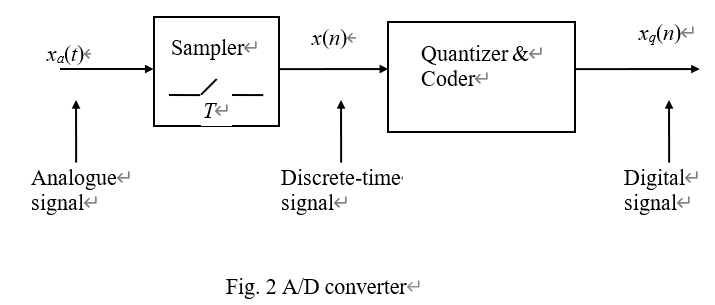

两步走:
 - 采样：
   - 在离散时刻取连续时间信号的值，输出离散时间信号。
   - 如果说$x_a(t)$是输入，那采样器的输出就是$x_a(nT)$，其中$T$是采样区间，$\frac{1}{T}$是采样频率
 - 量化编码
   - 将离散时间信号转化为数字信号。
   - 量化以前的和量化以后的信号的误差称之为量化误差
   - 量化误差：
  $$
  -\frac{\Delta}{2}\leq e_q(n)\leq\frac{\Delta}{2}
  $$
   - 其中，量化等级$\Delta$是：
  $$
  \Delta = \frac{x_{max}-x_{min}}{m-1}
  $$
   - 其中，$x_{max},x_{min}$是数字信号的上下界，$m$是量化等级的个数
   - AD所需的位数可以由下式计算得：
  $$
  b\geq \log_2m
  $$

# 2. DC(数转模转换器)

DC（也）是一种电脑和连续时间被控对象之间的接口，其结构如下：

![Alt text](image.png)



Decoder（解码器）的功能就是将数字信号转换为时间离散但值连续的信号。其传递函数如下：

$$
h(s) = \frac{1-\exp(-Ts)}{s}
$$

# 3. 采样率的选择



最佳采样率的选择是建立在一种妥协上的。

 - 数字控制器的采样率越高，其性能一般就越好
 - 采样率越高，成本越高
 - 低采样率意味着留给计算的时间更多，也就允许低速的计算机完成计算
 - 低采样率意味着留给转换的时间更多（对转换速度的要求较低）
 - 高采样率有时候需要更大的字长，也会增加成本

综合上述，最佳的选择是满足所有性能要求的最低采样率

选择采样率的经验原则：
 - 采样率必须至少是信号带宽的两倍
 - 采样区间必须至少比系统的最快的时间常数短五到十倍（$T$**是小时间常数的十分之一到五分之一**）

**时间常数的计算:**

![Alt text](image-7.png)

注意，必须把（s+什么玩意）的后面这个常数化为1，才能得到时间常数

# 4. Z变换

Z变换的定义（正统解法）：

![Alt text](image-1.png)

常见Z变换表见Week7 doc

最重要的Z转时域差分方程公式：

![Alt text](image-2.png)

注：等比求和：

$$
S_n = a_1\frac{1-q_n}{1-q}
$$

其中，$a_1$是数列首项，q是公比


# 5. 逆Z变换

几种变换：

 - z->s
 - s->z
 - z->n
 - s->t


注意，z和s的转换不是唯一对应的！！！

z->n的方法：留数法。

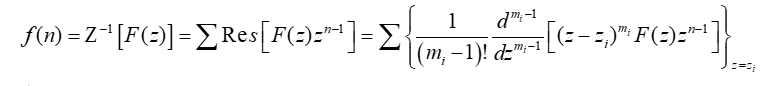

上式中，$z_i$都是极点

对于只有一阶极点的情况下，上式可以简化为：

![Alt text](image-4.png)

# 6. 作业

## 6.1

对于以下的被控对象：

![Alt text](image-5.png)

 - 计算其z域表达式
 - AD选择多少位可以使 $\pm10V$的电压量化误差小于0.005？

解：

1. 详见Programs\s2z.mlx



2. 用下式计算：


 ![Alt text](image-6.png)

 
   

$\Delta = 0.005,x_{max} = 10, x_{min} = -10$

$m= \frac{x_{max}-x_{min}}{\Delta}+1 = 4001$

$b = \log_2m = 11.9661$，向上取整到12

3. 确定采样频率

用极点算时间常数：两个时间常数是1/1,1/2 = 0.5

然后采样频率用较小的时间常数计算，采样区间T应当是其十分之一到五分之一。



## 6.2 

1. 对于下图，计算其输出

![Alt text](image-8.png)

![Alt text](image-9.png)

2. 数字控制器产生了以下的离散输出，此输出顶进零阶保持器里，画出保持器的输出

![Alt text](image-10.png)

3. 描述以下怎么给这个传递函数选择采样区间：

![Alt text](image-11.png)

4. 对于数模转换位数的计算式：

![Alt text](image-12.png)

描述一下各个变量的作用



解：

1. 所谓量化就是单纯的对连续值四舍五入变成整数，编码就是转为8421码
2. 输出就是一个台阶
3. $T_s < (0.1\sim0.2)\frac{1}{p}$
4. 讨论应考虑所有因素。例如，在电源电压固定的同时，增加量化电平的数量，即增加位，A/D精度提高，但成本预算要多得多。准确性应该在准确性和预算之间权衡。另一方面，如果比特是固定的，那么其他因素应该与特定的应用程序很好地平衡。


## 6.3 求下面函数的z变换

![Alt text](image-13.png)

解：

MATLAB只能给出标准答案，没法展示中间过程

中间过程需要用正统计算（Z变换的定义）慢慢算，然后用等比求和求出解

过程详见本周solution

结果验证：Programs\t2z.mlx



## 6.4 从下面的z式用留数法进行逆变换

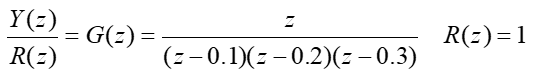

解：

直接参考留数法的公式就可以了

MATLAB验证结果：Programs\iztrans.mlx

## 6.5 将下述差分方程转为Z方程

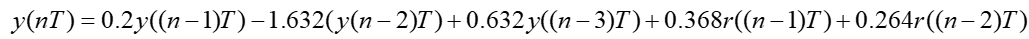

解：

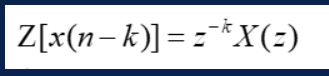

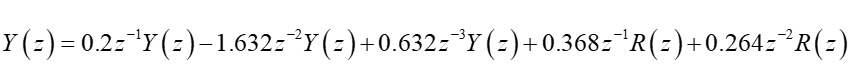

## 6.6 将下述的PID离散化

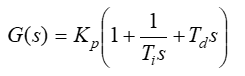

解：化简成三个分量相加之后直接查表



## 6.7 用差分方程算输出

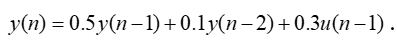

解：

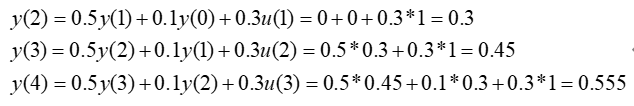

## 6.8 在simulink中对离散系统进行模拟

略